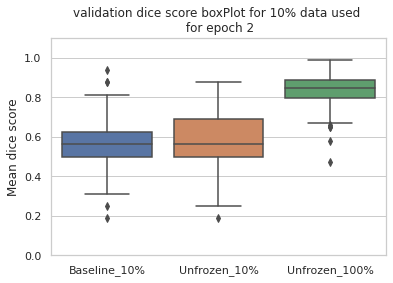

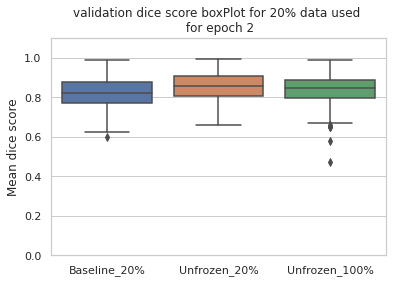

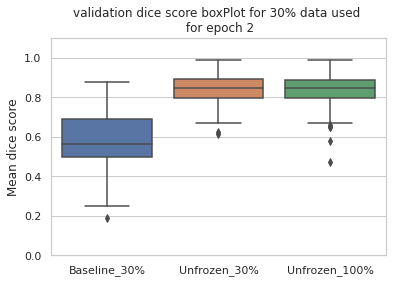

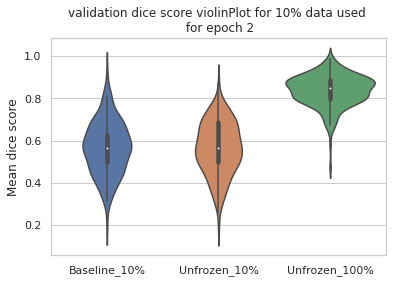

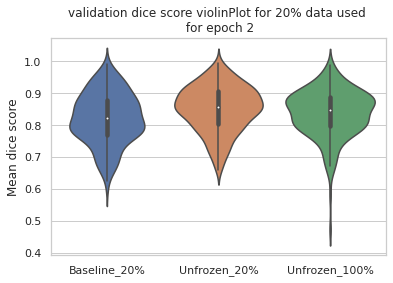

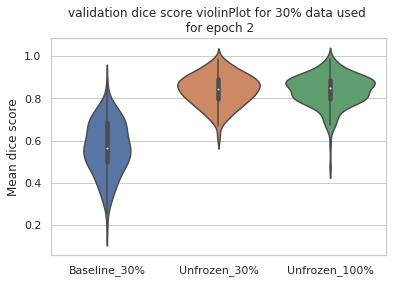

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

input_1 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_10_percent"
input_2 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_20_percent"
input_3 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_30_percent"
# input_4 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_10_percent"

input_11 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_10_percent"
input_12 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_20_percent"
input_13 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_30_percent"
# input_14 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_10_percent"

display_epoch = 2
data_amount = [10,20,30]#,40]
inputs = [input_1,input_2,input_3]#,input_4]
inputs2 = [input_11,input_12,input_13]#,input_14]
x_array = np.array([])
y_array = np.array([])
a_array = np.array([])

#for j in range(6):
a = np.genfromtxt("Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
a_array = np.append(a_array, a)
data_a = pd.DataFrame(data=a_array,columns=range(1)).assign(Data="Unfrozen_100%")

for i in range(len(inputs)):
    #for j in range(6):
    x = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    x_array = np.append(x_array, x)
    y = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs2[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    y_array = np.append(y_array, y)

    data_x = pd.DataFrame(data=x_array,columns=range(1)).assign(Data="Baseline_"+str(data_amount[i])+"%")
    data_y = pd.DataFrame(data=y_array,columns=range(1)).assign(Data="Unfrozen_"+str(data_amount[i])+"%")
    train_data = pd.concat([data_x,data_y,data_a])
    train_data_2 = pd.melt(train_data, id_vars=['Data'])

    ax = sns.boxplot(x="Data", y="value", data=train_data_2)
    plt.title("validation dice score boxPlot for " +str(data_amount[i])+"% data used \n for epoch " + str(display_epoch))
    plt.ylabel("Mean dice score")
    plt.xlabel("")
    plt.ylim(0,1.1)
    plt.show()
    x_array = np.array([])
    y_array = np.array([])
    z_array = np.array([])
    a_array = np.array([])
    
for i in range(len(inputs)):
    #for j in range(6):
    x = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    x_array = np.append(x_array, x)
    y = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs2[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    y_array = np.append(y_array, y)

    data_x = pd.DataFrame(data=x_array,columns=range(1)).assign(Data="Baseline_"+str(data_amount[i])+"%")
    data_y = pd.DataFrame(data=y_array,columns=range(1)).assign(Data="Unfrozen_"+str(data_amount[i])+"%")
    train_data = pd.concat([data_x,data_y,data_a])
    train_data_2 = pd.melt(train_data, id_vars=['Data'])

    ax = sns.violinplot(x="Data", y="value", data=train_data_2)
    plt.title("validation dice score violinPlot for " +str(data_amount[i])+"% data used \n for epoch " + str(display_epoch))
    plt.ylabel("Mean dice score")
    plt.xlabel("")
    plt.show()
    x_array = np.array([])
    y_array = np.array([])
    z_array = np.array([])
    a_array = np.array([])

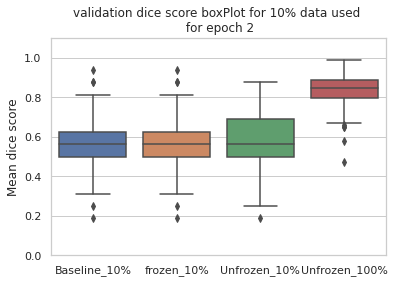

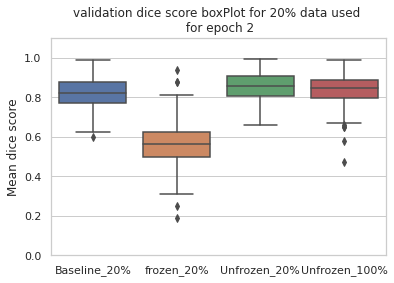

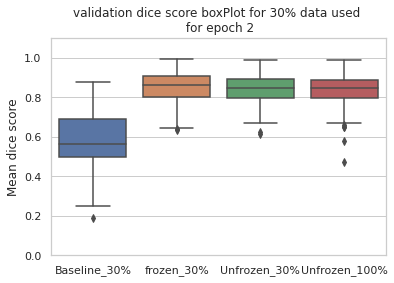

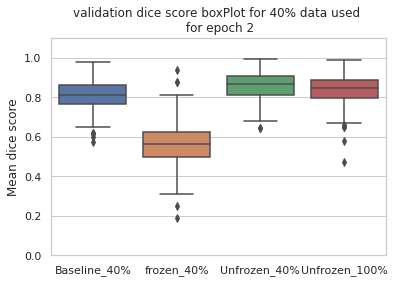

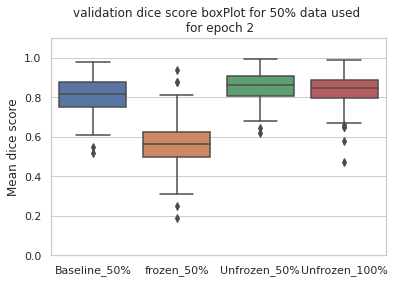

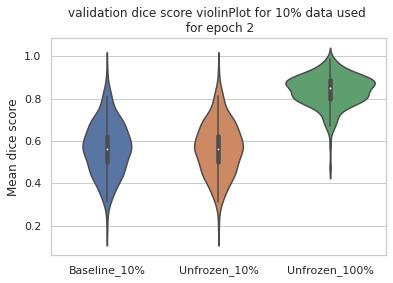

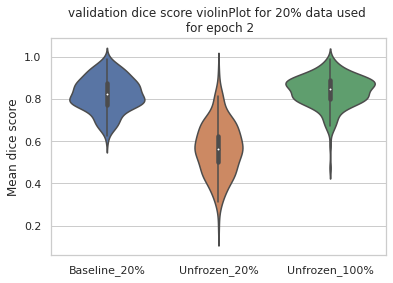

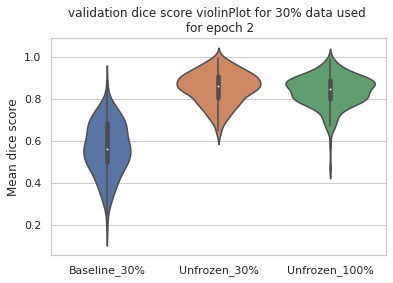

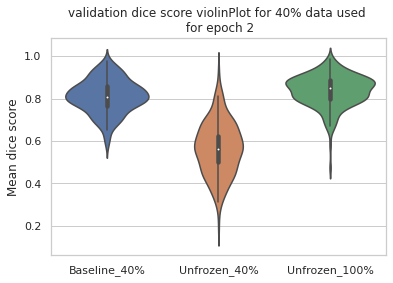

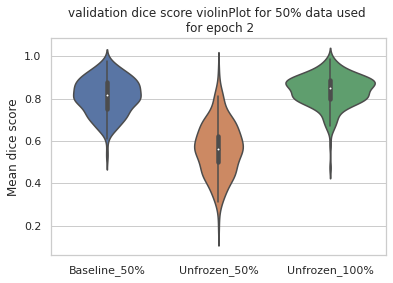

TypeError: concat() missing 1 required positional argument: 'objs'

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

input_1 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_10_percent"
input_2 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_20_percent"
input_3 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_30_percent"
input_4 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_40_percent"
input_5 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_50_percent"


input_11 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_10_percent"
input_12 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_20_percent"
input_13 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_30_percent"
input_14 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_40_percent"
input_15 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_50_percent"


input_21 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_10_percent"
input_22 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_20_percent"
input_23 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_30_percent"
input_24 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_40_percent"
input_25 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_50_percent"


display_epoch = 2
data_amount = [10,20,30,40,50]
inputs = [input_1,input_2,input_3,input_4,input_5]
inputs2 = [input_11,input_12,input_13,input_14,input_15]
inputs3 = [input_21,input_22,input_23,input_24,input_25]
x_array = np.array([])
y_array = np.array([])
z_array = np.array([])
a_array = np.array([])

#for j in range(6):
a = np.genfromtxt("Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
a_array = np.append(a_array, a)
data_a = pd.DataFrame(data=a_array,columns=range(1)).assign(Data="Unfrozen_100%")

for i in range(len(inputs)):
    #for j in range(6):
    x = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    x_array = np.append(x_array, x)
    y = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs2[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    y_array = np.append(y_array, y)
    z = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs3[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    z_array = np.append(z_array, z)
    
    data_x = pd.DataFrame(data=x_array,columns=range(1)).assign(Data="Baseline_"+str(data_amount[i])+"%")
    data_y = pd.DataFrame(data=y_array,columns=range(1)).assign(Data="frozen_"+str(data_amount[i])+"%")
    data_z = pd.DataFrame(data=z_array,columns=range(1)).assign(Data="Unfrozen_"+str(data_amount[i])+"%")
    
    train_data = pd.concat([data_x,data_y,data_z,data_a])
    train_data_2 = pd.melt(train_data, id_vars=['Data'])

    ax = sns.boxplot(x="Data", y="value", data=train_data_2)
    plt.title("validation dice score boxPlot for " +str(data_amount[i])+"% data used \n for epoch " + str(display_epoch))
    plt.ylabel("Mean dice score")
    plt.xlabel("")
    plt.ylim(0,1.1)
    plt.show()
    x_array = np.array([])
    y_array = np.array([])
    z_array = np.array([])
    a_array = np.array([])

for i in range(len(inputs)):
    #for j in range(6):
    x = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    x_array = np.append(x_array, x)
    y = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs2[i]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    y_array = np.append(y_array, y)

    data_x = pd.DataFrame(data=x_array,columns=range(1)).assign(Data="Baseline_"+str(data_amount[i])+"%")
    data_y = pd.DataFrame(data=y_array,columns=range(1)).assign(Data="Unfrozen_"+str(data_amount[i])+"%")
    train_data = pd.concat([data_x,data_y,data_a])
    train_data_3 = pd.melt(train_data, id_vars=['Data'])

    ax = sns.violinplot(x="Data", y="value", data=train_data_3)
    plt.title("validation dice score violinPlot for " +str(data_amount[i])+"% data used \n for epoch " + str(display_epoch))
    plt.ylabel("Mean dice score")
    plt.xlabel("")
    plt.show()
    x_array = np.array([])
    y_array = np.array([])
    z_array = np.array([])
    a_array = np.array([])
    
# for i in range(len(inputs)):
for j in range(5):
    x = np.genfromtxt("Checkpoints/split_data_experiments/"+inputs[j]+"/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
    x_array = np.append(x_array, x)
    
    data_f = pd.DataFrame(data=x_array,columns=range(1)).assign(Data="_"+str(j))

    train_data_f = pd.concat([data_f])
    train_data_g = pd.concat()
    train_data_4 = pd.melt(train_data_f, id_vars=['Data'])
    x_array = np.array([])
ax = sns.boxplot(x="Data", y="value", data=train_data_4)

plt.title("validation dice score boxPlot for " +str(data_amount[i])+"% data used \n for epoch " + str(display_epoch))

plt.ylabel("Mean dice score")
plt.xlabel("")
plt.ylim(0,1.1)
plt.show()


###########################################################################################################


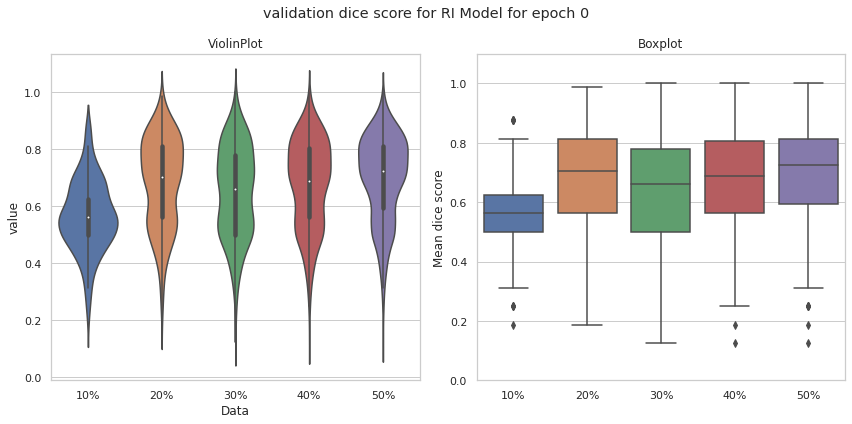

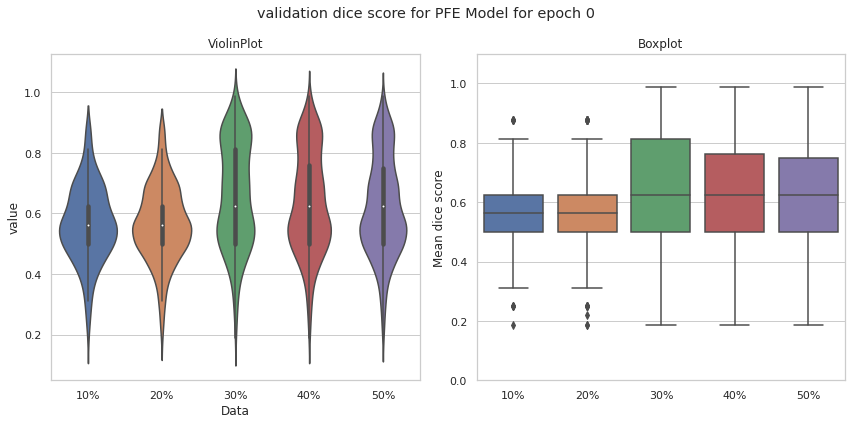

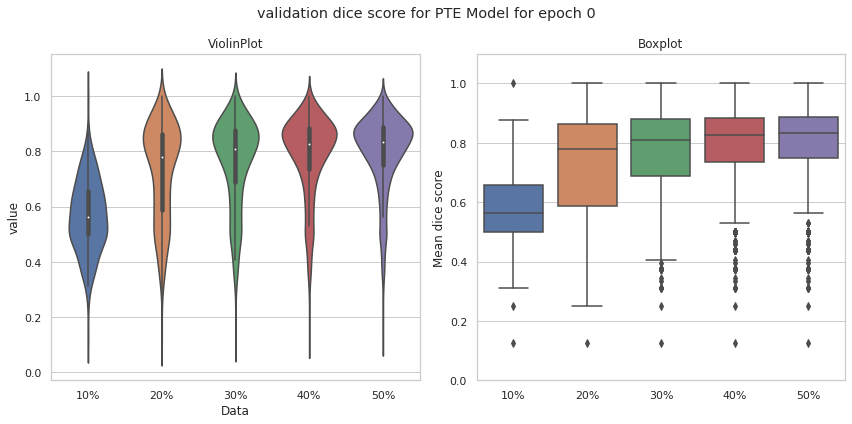

###########################################################################################################


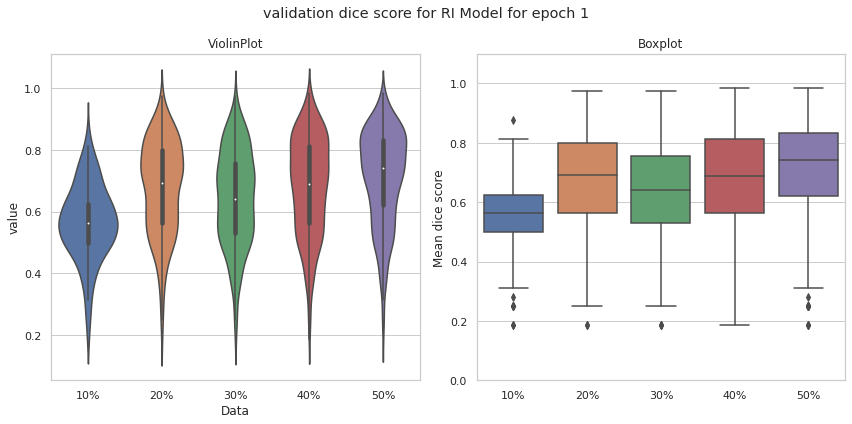

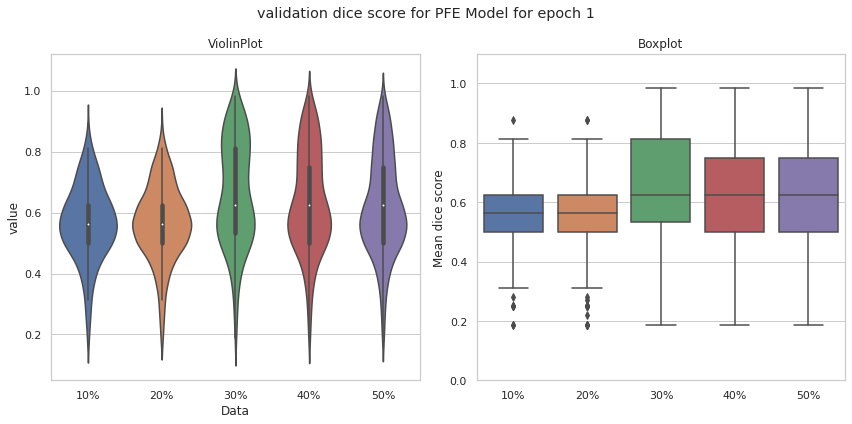

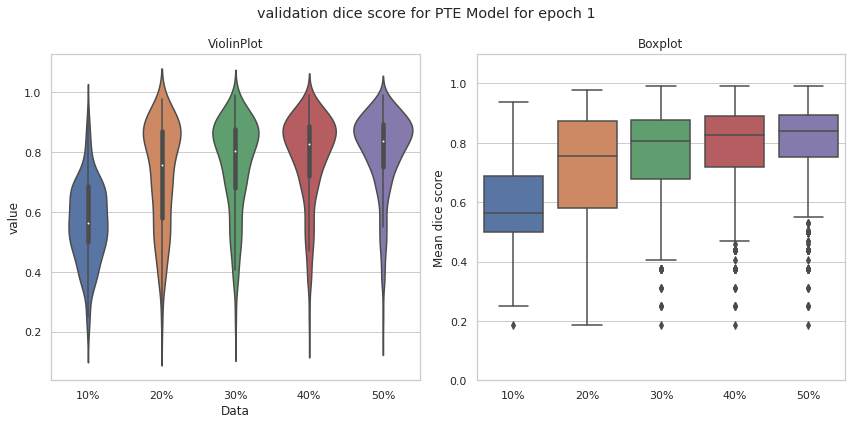

###########################################################################################################


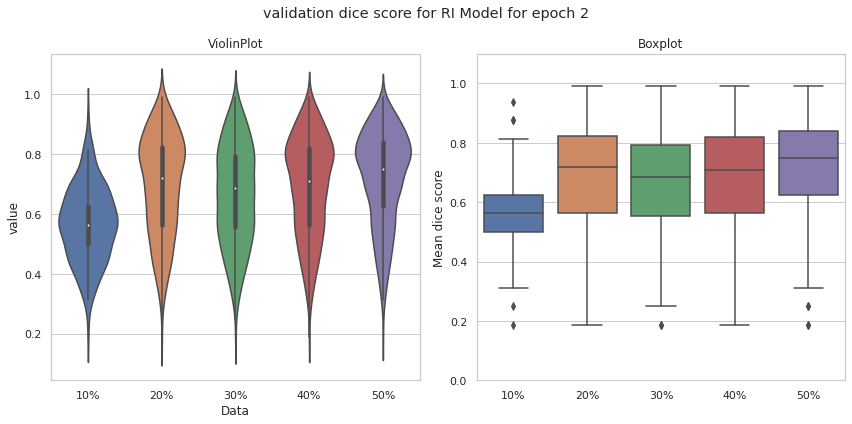

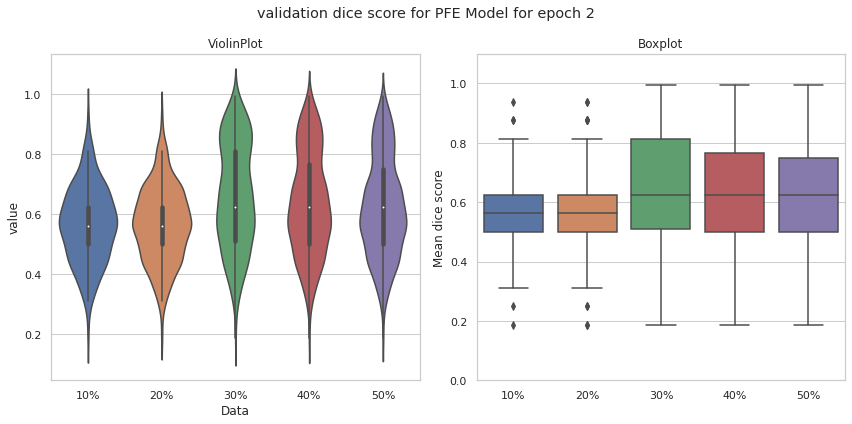

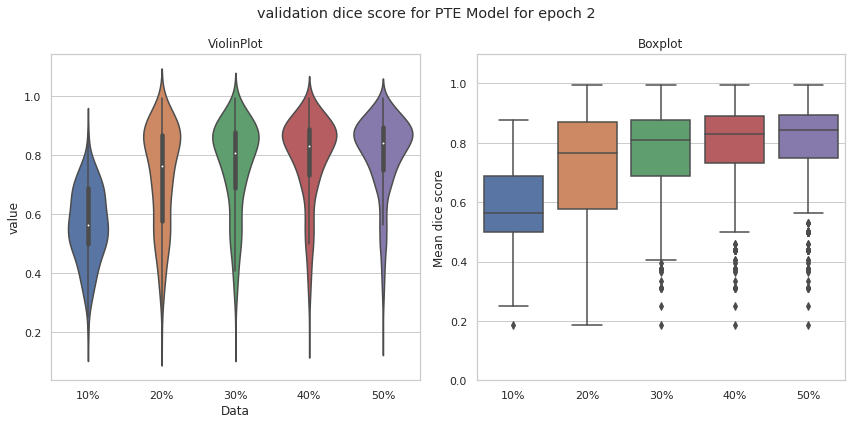

In [10]:
#### import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

input_1 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_10_percent"
input_2 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_20_percent"
input_3 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_30_percent"
input_4 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_40_percent"
input_5 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_50_percent"

input_11 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_10_percent"
input_12 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_20_percent"
input_13 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_30_percent"
input_14 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_40_percent"
input_15 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_50_percent"

input_21 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_10_percent"
input_22 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_20_percent"
input_23 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_30_percent"
input_24 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_40_percent"
input_25 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_50_percent"

title_output_model = ["RI", "PFE", "PTE"]
title_output_plot = ["Violinplot", "Boxplot"]

display_epoch = 2
data_amount = [10,20,30,40,50]
inputs = [input_1,input_2,input_3,input_4,input_5]
inputs2 = [input_11,input_12,input_13,input_14,input_15]
inputs3 = [input_21,input_22,input_23,input_24,input_25]

input_test = [inputs, inputs2, inputs3]

x_array = np.array([])
y_array = np.array([])
z_array = np.array([])
a_array = np.array([])

#for j in range(6):
a = np.genfromtxt("Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main/epoch_"+str(display_epoch)+"validation_dice.csv", delimiter=',')
a_array = np.append(a_array, a)
data_a = pd.DataFrame(data=a_array,columns=range(1)).assign(Data="Unfrozen_100%")

col_name = ['10%','20%','30%','40%','50%']
train_data = pd.DataFrame(data=None, columns=col_name).astype(int)

for epochs in range(3):
    print("###########################################################################################################")
    for i in range(len(input_test)):
        for j in range(len(input_test[i])):
            x = np.genfromtxt("Checkpoints/split_data_experiments/"+ input_test[i][j] +"/epoch_"+str(epochs)+"validation_dice.csv", delimiter=',')
            x_array = np.append(x_array, x)

            data_x = pd.DataFrame(data=x_array,columns=range(1)).assign(Data=str(data_amount[j])+"%")

            train_data = pd.concat([train_data, data_x])
            train_data_2 = pd.melt(train_data, id_vars=['Data'])

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

        sns.violinplot(ax=axes[0],x="Data", y="value", data=train_data_2)
        sns.boxplot(ax=axes[1],x="Data", y="value", data=train_data_2)

        fig.suptitle("validation dice score for " +title_output_model[i]+" Model for epoch " + str(epochs))
        axes[0].set_title("ViolinPlot")
        axes[1].set_title("Boxplot")

        plt.ylabel("Mean dice score")
        plt.xlabel("")
        plt.ylim(0,1.1)

        x_array = np.array([])
        y_array = np.array([])
        z_array = np.array([])
        a_array = np.array([])
        fig.tight_layout()
        plt.show()

        train_data = pd.DataFrame(data=None, columns=col_name).astype(int)

In [38]:
index = 154
x = ((index - (index % 155)) / 155)
print(x)
y = int(index % 155)
print(y)

0.0
154


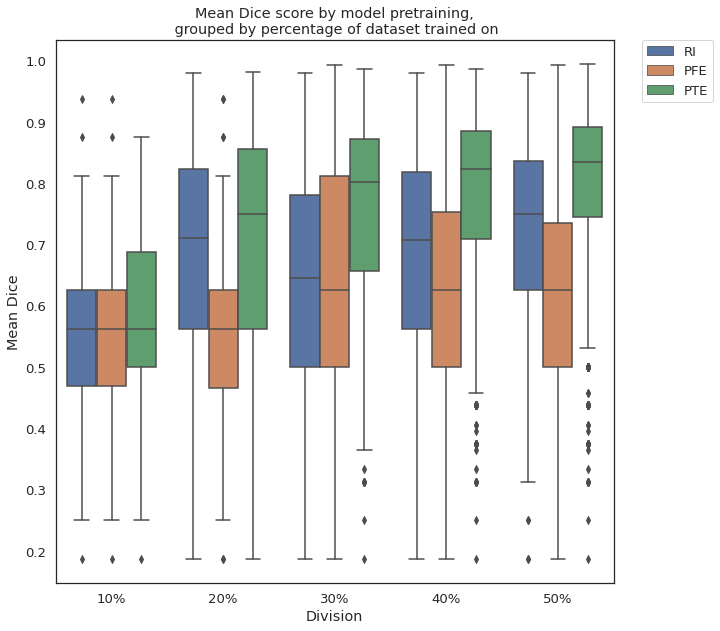

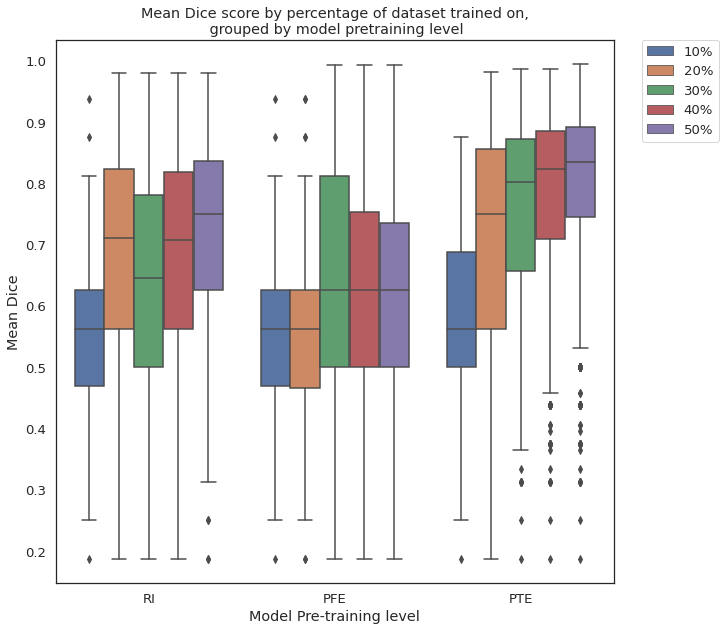

In [56]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

epoch = 2
# a number of the values in the plots below are missing due to the training only producing 214 slices instead of the
# number, not sure why this is the case, will need to retrain (which will be done on the test dataset anyways) and 
# keep an eye on the situation.

input_1 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_10_percent"
input_2 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_20_percent"
input_3 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_30_percent"
input_4 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_40_percent"
input_5 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_50_percent"

input_11 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_10_percent"
input_12 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_20_percent"
input_13 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_30_percent"
input_14 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_40_percent"
input_15 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_50_percent"

input_21 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_10_percent" # apparently this does not work
input_22 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_20_percent"
input_23 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_30_percent"
input_24 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_40_percent"
input_25 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_50_percent"

title_output_model = ["RI", "PFE", "PTE"]
col_name = ["10%","20%","30%","40%","50%"]
train_data_input = pd.DataFrame(data=None, columns=title_output_model)# .astype(int)

x_array = np.array([])
y_array = np.array([])
z_array = np.array([])
a_array = np.array([])

inputs = [input_1,input_2,input_3,input_4,input_5]
inputs2 = [input_11,input_12,input_13,input_14,input_15]
inputs3 = [input_21,input_22,input_23,input_24,input_25]

index = [0,1,2,3,4]
input_test = [inputs, inputs2, inputs3]

for i in range(len(index)):
    x = np.genfromtxt("Checkpoints/split_data_experiments/"+ input_test[0][index[i]] +"/epoch_"+str(epoch)+"validation_dice.csv", delimiter=',')
    x_array = np.append(x_array, x[:214])
    y = np.genfromtxt("Checkpoints/split_data_experiments/"+ input_test[1][index[i]] +"/epoch_"+str(epoch)+"validation_dice.csv", delimiter=',')
    y_array = np.append(y_array, y[:214])
    z = np.genfromtxt("Checkpoints/split_data_experiments/"+ input_test[2][index[i]] +"/epoch_"+str(epoch)+"validation_dice.csv", delimiter=',')
    z_array = np.append(z_array, z[:214])
    df1 = df = pd.DataFrame(data = {"Division":np.full(len(x_array), col_name[index[i]]),"RI":x_array,"PFE":y_array,"PTE":z_array})
    train_data_input = train_data_input.append(df1,ignore_index=True)

data = train_data_input.melt('Division', var_name='Model Pre-training level', value_name='Mean Dice')
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.2)
sns.set_style("white")
ax=sns.boxplot(y='Mean Dice', x='Division', hue='Model Pre-training level', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Dice score by model pretraining,\n grouped by percentage of dataset trained on")
plt.show()
    
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.2)
sns.set_style("white")
ax=sns.boxplot(y='Mean Dice', x='Model Pre-training level', hue='Division', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Dice score by percentage of dataset trained on,\n grouped by model pretraining level")
plt.show()

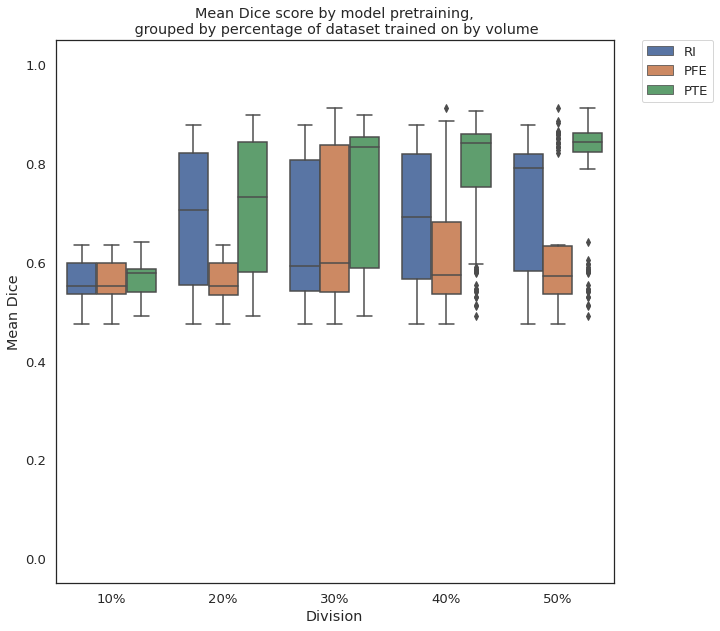

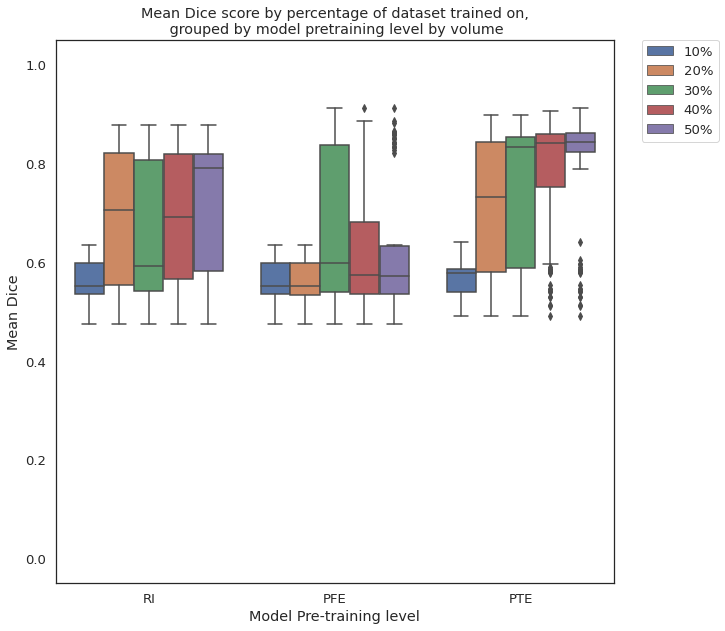

In [62]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

epoch = 2
# a number of the values in the plots below are missing due to the training only producing 214 slices instead of the
# number, not sure why this is the case, will need to retrain (which will be done on the test dataset anyways) and 
# keep an eye on the situation.

input_1 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_10_percent"
input_2 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_20_percent"
input_3 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_30_percent"
input_4 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_40_percent"
input_5 = "/Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main_50_percent"

input_11 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_10_percent"
input_12 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_20_percent"
input_13 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_30_percent"
input_14 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_40_percent"
input_15 = "/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_50_percent"

input_21 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_10_percent" # apparently this does not work
input_22 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_20_percent"
input_23 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_30_percent"
input_24 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_40_percent"
input_25 = "/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main_50_percent"

title_output_model = ["RI", "PFE", "PTE"]
col_name = ["10%","20%","30%","40%","50%"]
train_data_input = pd.DataFrame(data=None, columns=title_output_model)# .astype(int)

x_array = np.array([])
y_array = np.array([])
z_array = np.array([])
a_array = np.array([])

inputs = [input_1,input_2,input_3,input_4,input_5]
inputs2 = [input_11,input_12,input_13,input_14,input_15]
inputs3 = [input_21,input_22,input_23,input_24,input_25]

index = [0,1,2,3,4]
input_test = [inputs, inputs2, inputs3]

new_x_array_out = np.array([])
new_y_array_out = np.array([])
new_z_array_out = np.array([])

for i in range(len(index)):
    x = np.genfromtxt("Checkpoints/split_data_experiments/"+ input_test[0][index[i]] +"/epoch_"+str(epoch)+"validation_dice.csv", delimiter=',')
    new_x_array = [x[i//16] for i in range(214*16)]
    for s in range(int(int(len(new_x_array) -14) / 155)):
        new_x_array_out = np.append(new_x_array_out, np.mean(new_x_array[int(155*s):(155*(s+1))]))
    
    y = np.genfromtxt("Checkpoints/split_data_experiments/"+ input_test[1][index[i]] +"/epoch_"+str(epoch)+"validation_dice.csv", delimiter=',')
    new_y_array = [y[i//16] for i in range(214*16)]
    for s in range(int(int(len(new_y_array) -14) / 155)):
        new_y_array_out = np.append(new_y_array_out, np.mean(new_y_array[int(155*s):(155*(s+1))]))
        
    z = np.genfromtxt("Checkpoints/split_data_experiments/"+ input_test[2][index[i]] +"/epoch_"+str(epoch)+"validation_dice.csv", delimiter=',')
    new_z_array = [z[i//16] for i in range(214*16)]
    for s in range(int(int(len(new_z_array) -14) / 155)):
        new_z_array_out = np.append(new_z_array_out, np.mean(new_z_array[int(155*s):(155*(s+1))]))
#         new_z_array[new_z_array == 1.0] = 0 
#     print(np.min(new_z_array))
#     print(np.max(new_z_array))
#     print("")

    
#     print("###############")
#     print(new_x_array_out)
#     print(new_y_array_out)
#     print(new_z_array_out)
#     print("###############")
    
    df1 = df = pd.DataFrame(data = {"Division":np.full(len(new_x_array_out), col_name[index[i]]),
                                    "RI":new_x_array_out,
                                    "PFE":new_y_array_out,
                                    "PTE":new_z_array_out})
    
    train_data_input = train_data_input.append(df1,ignore_index=True)

data = train_data_input.melt('Division', var_name='Model Pre-training level', value_name='Mean Dice')
# print(data.describe())
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.2)
sns.set_style("white")
ax=sns.boxplot(y='Mean Dice', x='Division', hue='Model Pre-training level', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Dice score by model pretraining,\n grouped by percentage of dataset trained on by volume")
plt.ylim(-0.05,1.05)

plt.show()
    
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.2)
sns.set_style("white")
ax=sns.boxplot(y='Mean Dice', x='Model Pre-training level', hue='Division', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Dice score by percentage of dataset trained on,\n grouped by model pretraining level by volume")
plt.ylim(-0.05,1.05)
plt.show()

# so i think that the case of the examples being capped at a lower limit of 0.56 (ish) dice score is from the model
# guessing values from the model on blank slices (which would translate as 1 in this case) on slicewise basis.

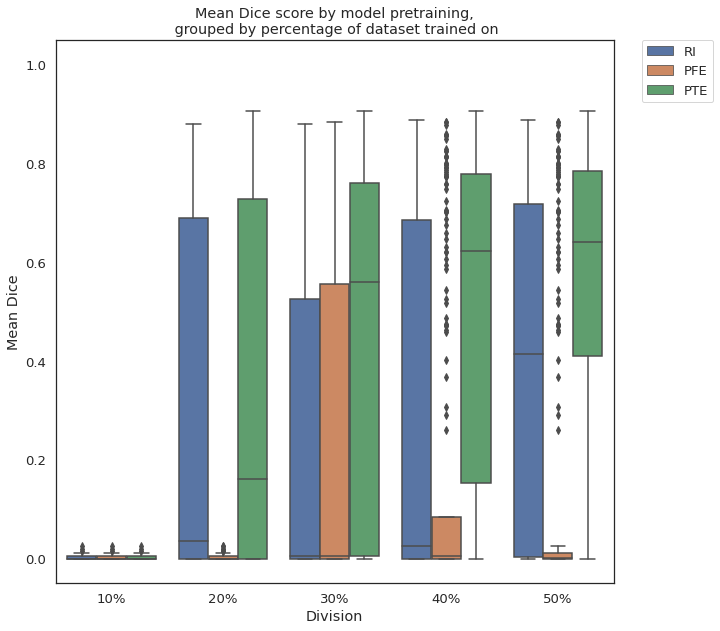

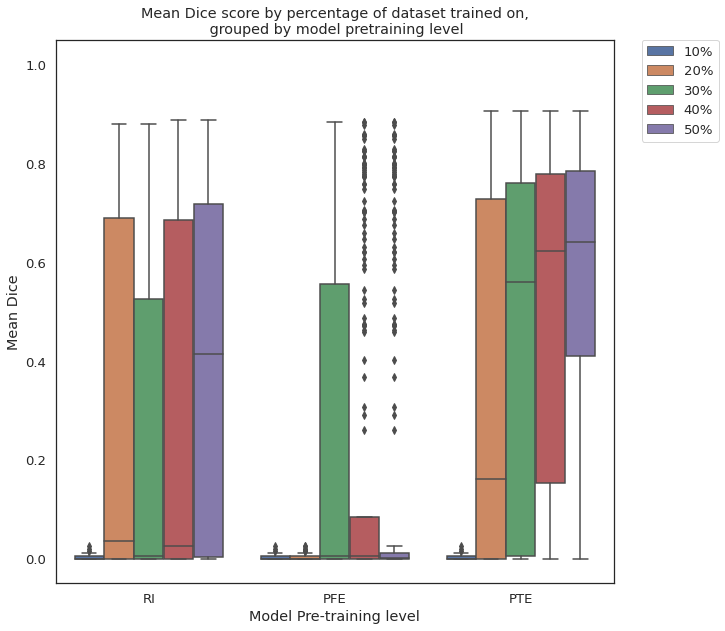

In [14]:
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

epoch = 2
# a number of the values in the plots below are missing due to the training only producing 214 slices instead of the
# number, not sure why this is the case, will need to retrain (which will be done on the test dataset anyways) and 
# keep an eye on the situation.

input_1 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_10%/step_"
input_2 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_20%/step_"
input_3 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_30%/step_"
input_4 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_40%/step_"
input_5 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_50%/step_"

input_11 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_10%/step_"
input_12 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_20%/step_"
input_13 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_30%/step_"
input_14 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_40%/step_"
input_15 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_50%/step_"

input_21 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_10%/step_"
input_22 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_20%/step_"
input_23 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_30%/step_"
input_24 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_40%/step_"
input_25 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_50%/step_"

title_output_model = ["RI", "PFE", "PTE"]
col_name = ["10%","20%","30%","40%","50%"]
train_data_input = pd.DataFrame(data=None, columns=title_output_model)# .astype(int)

x_array = np.array([])
y_array = np.array([])
z_array = np.array([])
a_array = np.array([])

inputs = [input_1,input_2,input_3,input_4,input_5]
inputs2 = [input_11,input_12,input_13,input_14,input_15]
inputs3 = [input_21,input_22,input_23,input_24,input_25]

index = [0,1,2,3,4]
input_test = [inputs, inputs2, inputs3]

for i in range(len(index)):
    x = np.genfromtxt(input_test[0][index[i]] + str(epoch) + "_Tumour_slice_validation_dice.csv", delimiter=',')
    x_array = np.append(x_array, x[:214])
    y = np.genfromtxt(input_test[1][index[i]] + str(epoch) + "_Tumour_slice_validation_dice.csv", delimiter=',')
    y_array = np.append(y_array, y[:214])
    z = np.genfromtxt(input_test[2][index[i]] + str(epoch) + "_Tumour_slice_validation_dice.csv", delimiter=',')
    z_array = np.append(z_array, z[:214])
    df1 = df = pd.DataFrame(data = {"Division":np.full(len(x_array), col_name[index[i]]),"RI":x_array,"PFE":y_array,"PTE":z_array})
    train_data_input = train_data_input.append(df1,ignore_index=True)

data = train_data_input.melt('Division', var_name='Model Pre-training level', value_name='Mean Dice')
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.2)
sns.set_style("white")
ax=sns.boxplot(y='Mean Dice', x='Division', hue='Model Pre-training level', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Dice score by model pretraining,\n grouped by percentage of dataset trained on")
plt.ylim(-0.05,1.05)
plt.show()
    
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 1.2)
sns.set_style("white")
ax=sns.boxplot(y='Mean Dice', x='Model Pre-training level', hue='Division', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Dice score by percentage of dataset trained on,\n grouped by model pretraining level")
plt.ylim(-0.05,1.05)
plt.show()